<a href="https://colab.research.google.com/github/Zebas25/devops-essentials-sample-app/blob/new-feature/Week_3_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd

In [11]:
from google.colab import drive 
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
path = '/content/drive/MyDrive/PGP-AIML Program by The University of Texas at Austin/Week 3/Automobile.csv'

In [19]:
df = pd.read_csv(path)

In [20]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

In [29]:
import plotly.express as px

In [30]:
path = '/content/drive/MyDrive/PGP-AIML Program by The University of Texas at Austin/Week 3/Placement_Data.csv'

In [31]:
df = pd.read_csv(path)

In [32]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [33]:
# Attribute Information:

#gender: This is the gender of the student.
#ssc_p: Secondary Education percentage- 10th Grade
#ssc_b: Board of Education- Central/ Others
#hsc_p: Higher Secondary Education percentage- 12th Grade
#hsc_b: Board of Education- Central/ Others
#hsc_s: Specialization in Higher Secondary Education
#degree_p: Degree Percentage
#degree_t: Under Graduation(Degree type)- Field of degree education
#workex: Work Experience
#etest_p: Employability test percentage (conducted by the college)
#specialisation: Post Graduation(MBA)- Specialization
#mba_p: MBA percentage
##status: Status of placement- Placed/Not placed 

In [36]:
placed_count = df[df['status'] == 'Placed'].shape[0]
print("Number of placed candidates:", placed_count)

Number of placed candidates: 148


In [38]:
print(df.describe())

            ssc_p       hsc_p    degree_p     etest_p       mba_p
count  215.000000  215.000000  215.000000  215.000000  215.000000
mean    67.303395   66.333163   66.370186   72.100558   62.278186
std     10.827205   10.897509    7.358743   13.275956    5.833385
min     40.890000   37.000000   50.000000   50.000000   51.210000
25%     60.600000   60.900000   61.000000   60.000000   57.945000
50%     67.000000   65.000000   66.000000   71.000000   62.000000
75%     75.700000   73.000000   72.000000   83.500000   66.255000
max     89.400000   97.700000   91.000000   98.000000   77.890000


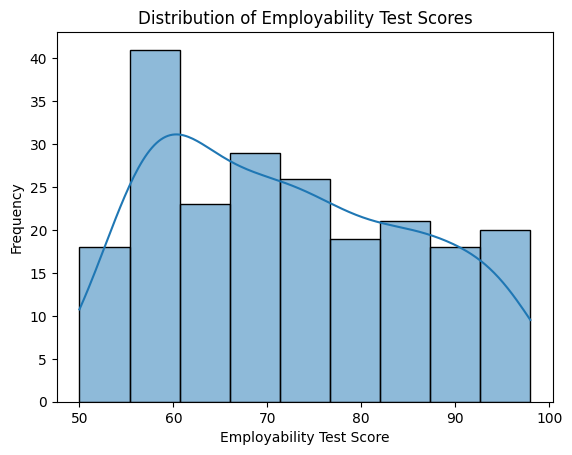

In [39]:
sns.histplot(data=df, x='etest_p', kde=True)
plt.title('Distribution of Employability Test Scores')
plt.xlabel('Employability Test Score')
plt.ylabel('Frequency')
plt.show()

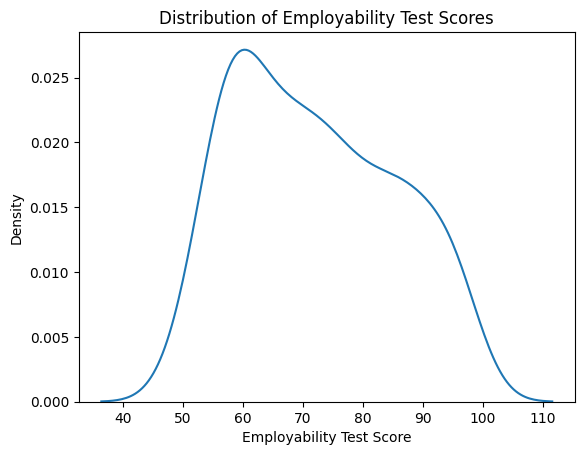

In [40]:
sns.kdeplot(data=df, x='etest_p')
plt.title('Distribution of Employability Test Scores')
plt.xlabel('Employability Test Score')
plt.ylabel('Density')
plt.show()

<Axes: xlabel='hsc_s', ylabel='count'>

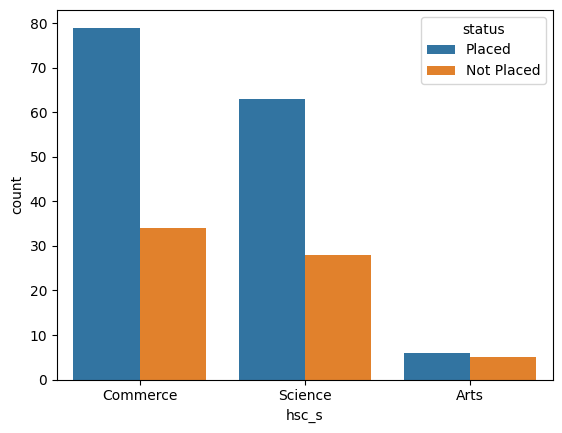

In [42]:
sns.countplot(x = 'hsc_s', data = df, hue = 'status')

<Axes: xlabel='hsc_s', ylabel='count'>

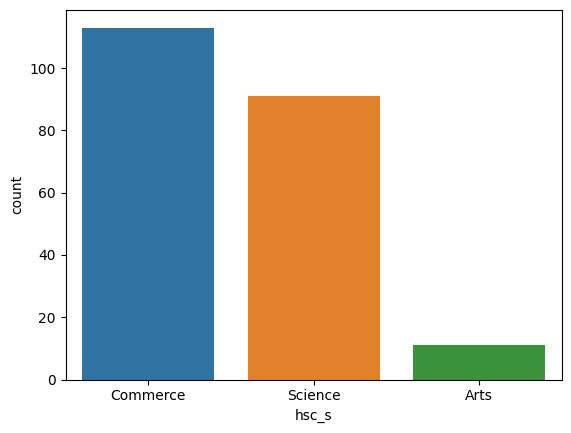

In [43]:
sns.countplot(x = 'hsc_s', data = df)

In [45]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Find the column pairs with the highest correlation
highest_corr = corr_matrix.unstack().sort_values(ascending=False)
highest_corr = highest_corr[highest_corr != 1.0]  # Exclude self-correlation

# Print the column pairs with the highest correlation
print(highest_corr.head())


ssc_p     degree_p    0.538404
degree_p  ssc_p       0.538404
ssc_p     hsc_p       0.511472
hsc_p     ssc_p       0.511472
          degree_p    0.434206
dtype: float64


<ipython-input-45-96636c1fec17>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


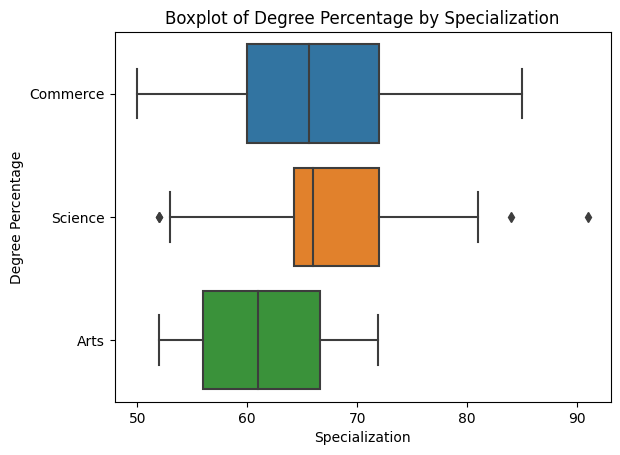

In [47]:
sns.boxplot(data=df, y='hsc_s', x='degree_p')
plt.title("Boxplot of Degree Percentage by Specialization")
plt.xlabel("Specialization")
plt.ylabel("Degree Percentage")
plt.show()

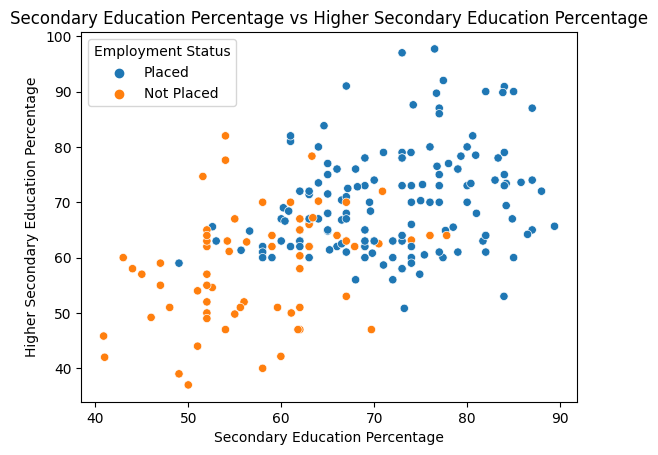

In [48]:
# Create a scatter plot with hue based on employment status
sns.scatterplot(data=df, x='ssc_p', y='hsc_p', hue='status')
plt.title("Secondary Education Percentage vs Higher Secondary Education Percentage")
plt.xlabel("Secondary Education Percentage")
plt.ylabel("Higher Secondary Education Percentage")
plt.legend(title="Employment Status")
plt.show()

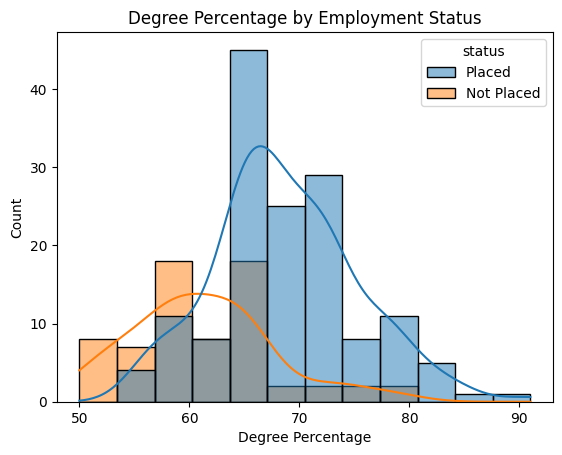

In [64]:
# Create a bar plot with hue based on employment status
sns.histplot(data=df, x= 'degree_p', hue='status', kde=True)
plt.title("Degree Percentage by Employment Status")
plt.xlabel("Degree Percentage")
plt.ylabel("Count")
plt.show()

In [65]:
# Filter the dataframe for not placed students
not_placed_df = df[df['status'] == 'Not Placed']

# Calculate the percentage of not placed students with Secondary Education percentage less than 65%
percentage = (not_placed_df[not_placed_df['ssc_p'] < 65].shape[0] / not_placed_df.shape[0]) * 100

print("Percentage of not placed students with Secondary Education percentage less than 65%:", percentage)

Percentage of not placed students with Secondary Education percentage less than 65%: 82.08955223880598


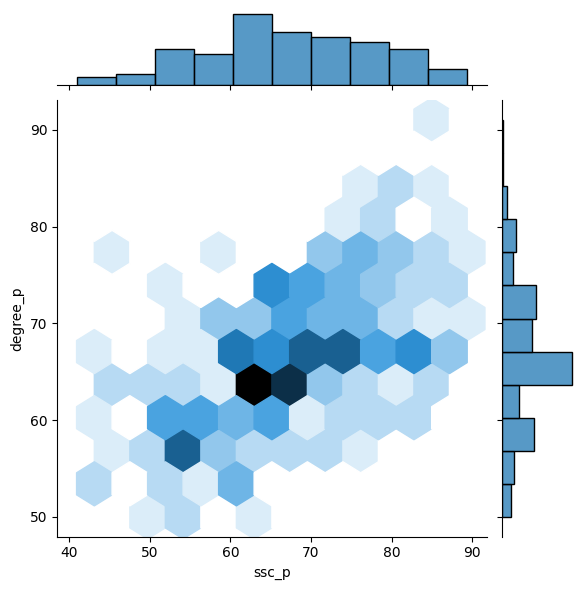

In [67]:
# Create a hexplot using jointplot
sns.jointplot(data=df, x='ssc_p', y='degree_p', kind='hex')

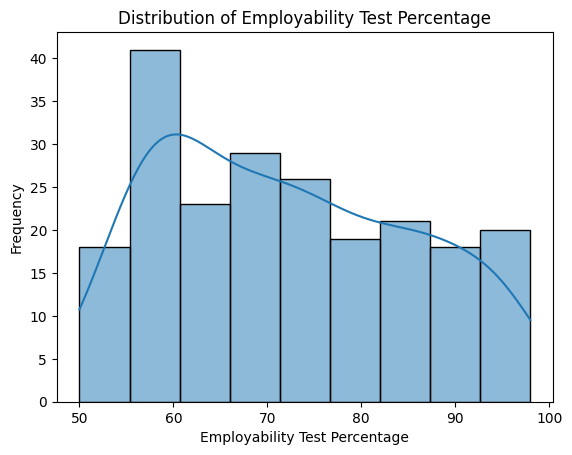

In [68]:
# Create a histogram of the Employability test percentage data
sns.histplot(data=df, x='etest_p', kde=True)
plt.title('Distribution of Employability Test Percentage')
plt.xlabel('Employability Test Percentage')
plt.ylabel('Frequency')
plt.show()

In [69]:
# Find the highest percentage in the Employability test
highest_percentage = df['etest_p'].max()

print("Highest percentage scored in the Employability test:", highest_percentage)

Highest percentage scored in the Employability test: 98.0
